In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [4]:
import FinanceDataReader as fdr

apple = fdr.DataReader('AAPL', '2010')
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410789,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400


<AxesSubplot:xlabel='Date'>

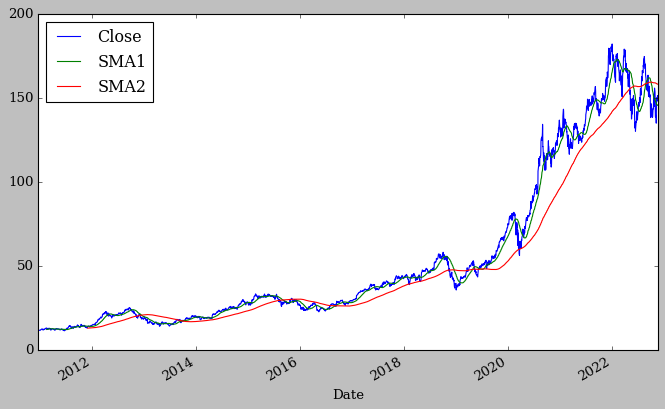

In [29]:
# 단기 이동평균선(42) 과 장기 이동평균선 계산(252)

SMA1 = 42
SMA2 = 242

# 이동평균선 계산
apple['SMA1'] = apple['Close'].rolling(SMA1).mean()
apple['SMA2'] = apple['Close'].rolling(SMA2).mean()

# 시각화
apple = apple[['Close', 'SMA1', 'SMA2']]
apple.plot(figsize=(10,6))

In [30]:
apple.dropna(inplace=True)

apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)
apple

C:\Users\an373\AppData\Local\Temp\ipykernel_16168\2011923027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple.dropna(inplace=True)
C:\Users\an373\AppData\Local\Temp\ipykernel_16168\2011923027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Position'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)


,Close,SMA1,SMA2,Position
Date,,,,
2011-11-30,13.650000,13.965094,12.844782,1
2011-12-01,13.854643,13.976429,12.854622,1
2011-12-02,13.917857,13.991054,12.864818,1
2011-12-05,14.036071,14.003605,12.875267,1
2011-12-06,13.962500,14.015153,12.885118,1
...,...,...,...,...
2022-11-15,150.039993,145.898094,158.284132,-1
2022-11-16,148.789993,145.762618,158.218099,-1
2022-11-17,150.720001,145.615475,158.164215,-1


(-1.2, 1.2)

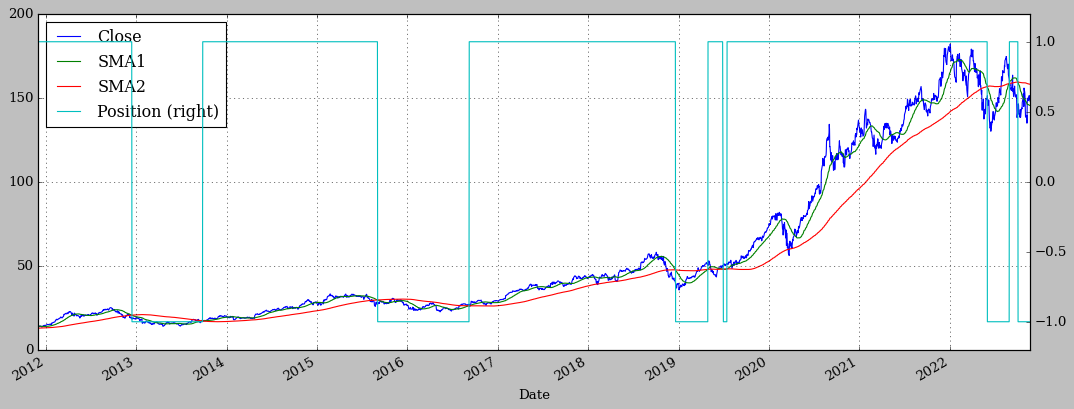

In [45]:
ax = apple.plot(secondary_y = 'Position', figsize=(16,6), grid=True)
plt.ylim(-1.2,1.2)